In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os

In [2]:
data_folder = "/Users/Emlilio/School/Internships/UR ASTRO/Data/"

In [3]:
drpall_fn = data_folder + 'MaNGA_DR17_BPT_vflag.fits'
drpall_env = Table.read(drpall_fn, format="fits",hdu=1)


In [4]:
drpall_fn = data_folder + 'drpall_ttype_R90_chi2_halpha_stellar_run2.fits'
drpall = Table.read(drpall_fn, format="fits",hdu=1)


In [5]:
drpall_dict = {}                                    #create the dictionary

for i in range(len(drpall)):                        #looping through drpall and redefining the index in terms
    plateifu = drpall['plateifu'][i]                #of the plateifu for simplicity			
    drpall_dict[plateifu]=i

In [6]:
if 'DPA' not in drpall.colnames:
    drpall['DPA'] = np.ones(len(drpall)) * -999
drpall[1]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,TType,R90,vmax,alpha,Rturn,PA,i_angle,center_x,center_y,sys_vel,stellar_vmax,stellar_alpha,stellar_Rturn,stellar_PA,stellar_i_angle,stellar_center_x,stellar_center_y,stellar_sys_vel,smoothness_score,chi_nu,stellar_chi_nu,DPA
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12702,10001-12702,1-48188,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.685669869,57.4802503218,159.390126911,39.0253440844,133.68567,57.48025,0.0492053,9,8100.81,0,20.0835,41.292,ma078,25,3,9114,134.41357,57.604214,1.10569,1.15089,1.21106,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.72072,2.66314,2.64652,2.61686,2080,0,0,1,plateTargets-1.par,6013,J085444.56+572848.8,127,217,0,0.0408108,0.0193227,0.0264533,0.0386469,0.042869,0.0188554,0.0266531,0.794785,-999.0,0.651037,0.681893,1.04947,1.13205,-999.0,0.631507,0.660498,35,3600,5,v1_0_1,51261,-999,0.0408108,0.0411932,-15.9069 .. -19.6569,-16.127 .. -19.5493,206.664 .. 49.3569,5341650000.0,4642460000.0,0.598115,12.5169,0.405779 .. 0.072394,7.01311,6.11281,12.4553 .. 396.399,2.27628 .. 0.000372112,12.4406 .. 390.985,2.3517 .. 0.000398299,0.508217,1.44272,12.3759,8.34906,10.1128 .. 432.884,3.38905 .. 0.00964978,4.730921268463135,14.355437278747559,140.3505372170482,1.718024074618078,1.9496275184474552,3.2966394523981752,0.8660160434231764,36.74943129144184,37.9934097776187,1.306167964169673,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.5619979358006435,2.0965007012952115,-999.0,-999.0


In [7]:
data_set = []

for row in range(len(drpall)):
    plateifu = drpall['plateifu'][row]
    index = drpall_dict[plateifu]
    ssv = drpall['stellar_sys_vel'][index]
    hsv = drpall['sys_vel'][index]
    if hsv == -999 or ssv == -999:
        continue
    else:
        data_set.append(plateifu)

len(data_set)

4343

here i separated the different types of galaxies into their corresponding arrays, in those arrays i stored the difference in position angle rather than the plateifu.

In [8]:
star_forming = []
composite = []
AGN = []
unclassified = []
all_gal = []

for plateifu in data_set:
    index = drpall_dict[plateifu]
    gal_class = drpall_env['BPT_class'][index]
    deltaphi = abs((drpall['stellar_PA'][index] - drpall['PA'][index])*180/np.pi)
   # chi2 = drpall['chi_nu'][index]
   # schi2 = drpall['stellar_chi_nu'][index]
   # if chi2>200 or schi2>200:
   #     continue
    if deltaphi>500:
        continue
    if deltaphi>=180:
        deltaphi = deltaphi-180
        
    drpall['DPA'][index] =  deltaphi
    all_gal.append(abs(deltaphi))
    if gal_class == 0.0:
        unclassified.append(abs(deltaphi))
    elif gal_class == 1.0:
        star_forming.append(abs(deltaphi))
    elif gal_class == 2.0:
        composite.append(abs(deltaphi))
    elif gal_class == 3.0:
        AGN.append(abs(deltaphi))
    else:
        print('error : ',index)
        continue
        
len(all_gal)

4343

# Delta phi by gal type

Text(0.5, 1.0, 'separation by type')

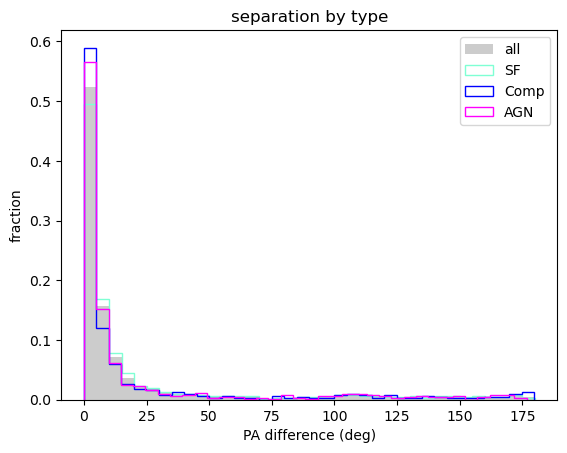

In [9]:
weights_all  = np.ones_like(all_gal) / len(all_gal)
weights_sf  = np.ones_like(star_forming) / len(star_forming)
weights_agn = np.ones_like(AGN) / len(AGN)
weights_comp = np.ones_like(composite) / len(composite)

bins_all = 36

plt.hist(all_gal     , bins = bins_all, weights = weights_all , color = 'black'     ,   label = 'all',alpha = 0.2)
plt.hist(star_forming, bins = bins_all, weights = weights_sf  , color = 'aquamarine', histtype='step',   label = 'SF')
plt.hist(composite   , bins = bins_all, weights = weights_comp, color = 'blue'       , histtype='step',   label = 'Comp')
plt.hist(AGN         , bins = bins_all, weights = weights_agn , color = 'magenta'   , histtype='step',   label = 'AGN' )

plt.legend(loc='upper right', fancybox=True, framealpha=0.8, fontsize=10)

#plt.xlim(0,round(np.max(all_gal)+1))
plt.ylabel('fraction')

plt.xlabel('PA difference (deg)')

plt.title('separation by type')

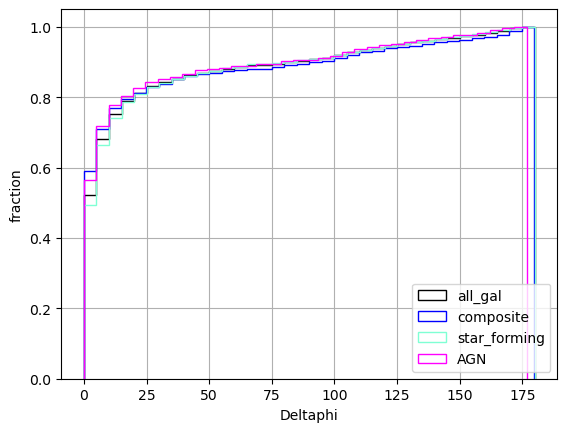

In [10]:
fig = plt.figure()
axs = fig.subplots(1, sharex=True, sharey=True)

# Cumulative distributions.
#axs.ecdf(all_gal, label="all", color = 'black',alpha = 0.5,linewidth = 1)
#axs.ecdf(composite, label="Comp", color = 'blue',alpha = 0.5,linewidth = 1)
#axs.ecdf(star_forming, label="SF", color = 'aquamarine',alpha = 0.5,linewidth = 1)
#axs.ecdf(AGN, label="AGN", color = 'magenta',alpha = 0.5,linewidth = 1)
n, bins, patches = axs.hist(all_gal, 36, density=True, histtype="step", cumulative=True, label="all_gal", color = 'black')
n, bins, patches = axs.hist(composite, 36, density=True, histtype="step", cumulative=True, label="composite", color = 'blue')
n, bins, patches = axs.hist(star_forming, 36, density=True, histtype="step", cumulative=True, label="star_forming", color = 'aquamarine')
n, bins, patches = axs.hist(AGN, 36, density=True, histtype="step", cumulative=True, label="AGN", color = 'magenta')
axs.grid(True)
axs.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=10)
axs.set_xlabel("Deltaphi")
axs.set_ylabel("fraction")
axs.label_outer()
plt.show()

# Separation by environment

In [11]:
wall_gal = []
void_gal = []
all_env  = []
for plateifu in data_set:
    index = drpall_dict[plateifu]
    gal_class = drpall_env['BPT_class'][index]
    deltaphi = abs((drpall['stellar_PA'][index] - drpall['PA'][index])*180/np.pi)
    env_type = drpall_env['vflag_VF'][index]
   # chi2 = drpall['chi_nu'][index]
   # schi2 = drpall['stellar_chi_nu'][index]
   # if chi2>200 or schi2>200:
   #     continue
    if deltaphi>500:
        continue
    if deltaphi>=180:
        deltaphi = deltaphi-180
    all_env.append((deltaphi))
    if env_type == 0.0:
        wall_gal.append((deltaphi))
    elif env_type == 1.0:
        void_gal.append((deltaphi))
   
    else:
        #print('error : ',index,env_type)
        continue
len(all_env)

4343

# Delta phi by environment

Text(0.5, 1.0, 'separation by environment')

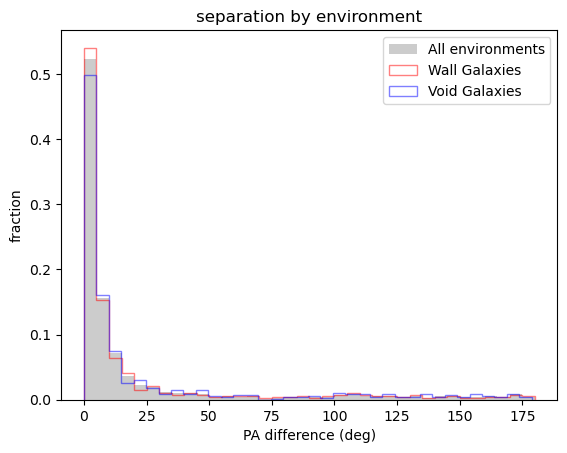

In [12]:
weights_all_env  = np.ones_like(all_env) / len(all_env)
weights_wall  = np.ones_like(wall_gal) / len(wall_gal)
weights_void = np.ones_like(void_gal) / len(void_gal)

bins_env = 36

plt.hist(all_env, bins = bins_env,weights = weights_all_env, color = 'black', alpha = .2, label = 'All environments')
plt.hist(wall_gal, bins = bins_env,weights = weights_wall, color = 'red' , label = 'Wall Galaxies', histtype='step',alpha = .5)
plt.hist(void_gal, bins = bins_env,weights = weights_void, color = 'blue', label = 'Void Galaxies', histtype='step',alpha = .5)

plt.legend(loc='upper right', fancybox=True, framealpha=0.8, fontsize=10)

#plt.xlim(0,round(np.max(all_env)+1))
plt.ylabel('fraction')

plt.xlabel('PA difference (deg)')

plt.title('separation by environment')

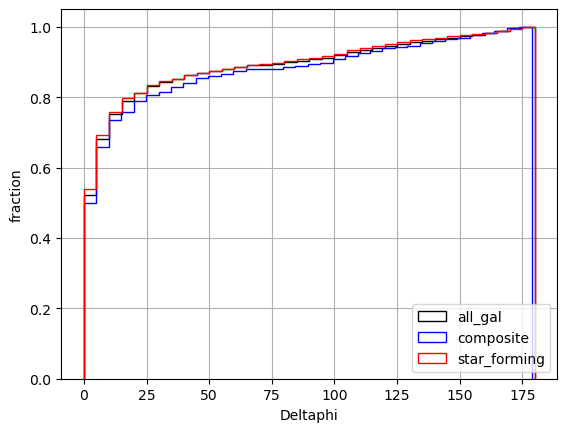

In [26]:
fig = plt.figure()
axs = fig.subplots(1, sharex=True, sharey=True)


n, bins, patches = axs.hist(all_env, 36, density=True, histtype="step", cumulative=True, label="all_gal", color = 'black')
n, bins, patches = axs.hist(void_gal, 36, density=True, histtype="step", cumulative=True, label="composite", color = 'blue')
n, bins, patches = axs.hist(wall_gal, 36, density=True, histtype="step", cumulative=True, label="star_forming", color = 'red')
axs.grid(True)
axs.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=10)
axs.set_xlabel("Deltaphi")
axs.set_ylabel("fraction")
axs.label_outer()
plt.show()

# BPT lists

In [13]:
BPT_data_x = []
BPT_data_y = []

BPT_unclass = []


BPT_star_formingx = []
BPT_star_formingy = []

BPT_compositex = []
BPT_compositey = []

BPT_AGNx = []
BPT_AGNy = []

for plateifu in data_set:
    index = drpall_dict[plateifu]
    gal_class = drpall_env['BPT_class'][index]

    n2ha = drpall_env['N2Ha'][index]
    o3hb = drpall_env['O3Hb'][index]
    if o3hb == -999.0 or n2ha == -999.0:
        continue
    BPT_data_x.append(n2ha)
    BPT_data_y.append(o3hb)

    if gal_class == 0.0:
        continue
    elif gal_class == 1.0:
        BPT_star_formingx.append(n2ha)
        BPT_star_formingy.append(o3hb)
    elif gal_class == 2.0:
        BPT_compositex.append(n2ha)
        BPT_compositey.append(o3hb)
    elif gal_class == 3.0:
        BPT_AGNx.append(n2ha)
        BPT_AGNy.append(o3hb)
    else:
        print('error : ',index)
        continue

# BPT plot

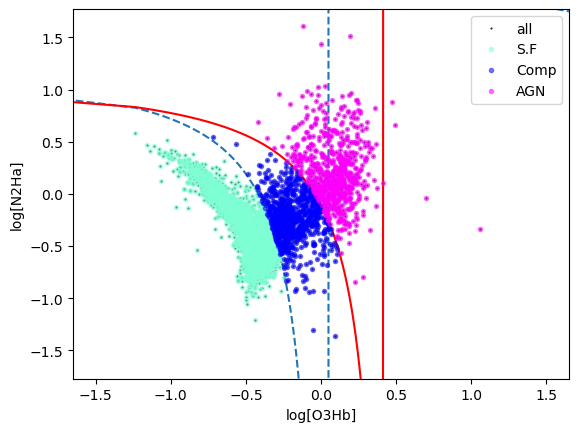

In [14]:
BPT_data_xsorted = np.sort(BPT_data_x)

Ka03 = (0.61/(np.array(BPT_data_xsorted)-0.05))+1.3 # <np.array(BPT_data_y)
Ke01 = (0.61/(np.array(BPT_data_xsorted)-0.47))+1.19  #>np.array(BPT_data_y)



plt.plot(BPT_data_x,BPT_data_y, marker = '.', linestyle = '', color = 'black' ,markersize = '1',label = 'all',zorder = 1)

plt.plot( BPT_data_xsorted, Ka03, linestyle = '--')
plt.plot( BPT_data_xsorted, Ke01, linestyle = '-',color = 'red')

plt.plot(BPT_star_formingx, BPT_star_formingy, marker = '.', linestyle = '', color = 'aquamarine',alpha = .5,label = 'S.F')
plt.plot(BPT_compositex   , BPT_compositey   , marker = '.', linestyle = '', color = 'blue'      ,alpha = .5,label = 'Comp')
plt.plot(BPT_AGNx         , BPT_AGNy         , marker = '.', linestyle = '', color = 'magenta'   ,alpha = .5,label = 'AGN')

plt.legend(loc='upper right', fancybox=True, framealpha=0.8, fontsize=10, facecolor = 'white')

plt.ylim(-np.mean(BPT_data_y)-2,np.mean(BPT_data_y)+2)
plt.xlim(-np.mean(BPT_data_x)-2,np.mean(BPT_data_x)+2)
plt.xlabel('log[O3Hb]')
plt.ylabel('log[N2Ha]');

In [15]:
np.min(BPT_data_x)

np.float64(-28.55597890223336)

# Chi2 

In [16]:
chi2_s_list = []
chi2_h_list = []
chi2_s_listc = []
chi2_h_listc = []
stellar_sysvel = []
halpha_sysvel = []
for plateifu in data_set:
    index = drpall_dict[plateifu]
    chi2_s = drpall['stellar_chi_nu'][index]
    chi2_h = drpall['chi_nu'][index]
    sys_vel_s = drpall['stellar_sys_vel'][index]
    sys_vel = drpall['sys_vel'][index]

    #if chi2_s == -999 or chi2_h == -999 or sys_vel == -999:
    #    continue
   # else:
    chi2_s_list.append(chi2_s)
    chi2_h_list.append(chi2_h)
    stellar_sysvel.append(sys_vel_s)
    halpha_sysvel.append(sys_vel)
        

    


4343


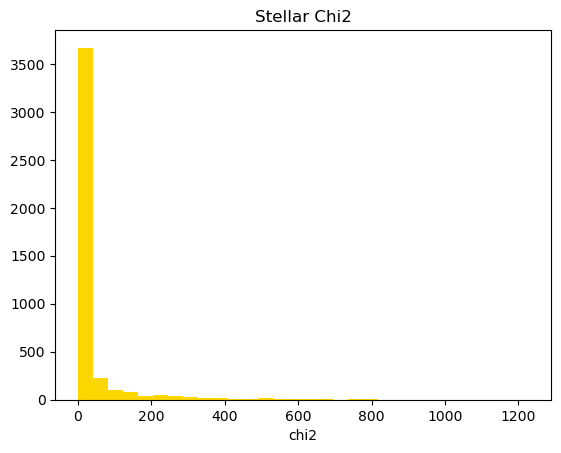

In [25]:
plt.hist(chi2_s_list, bins = 30, color = 'gold');
plt.title('Stellar Chi2')
plt.xlabel('chi2')
print(len(data_set))

Text(0.5, 0, 'chi2')

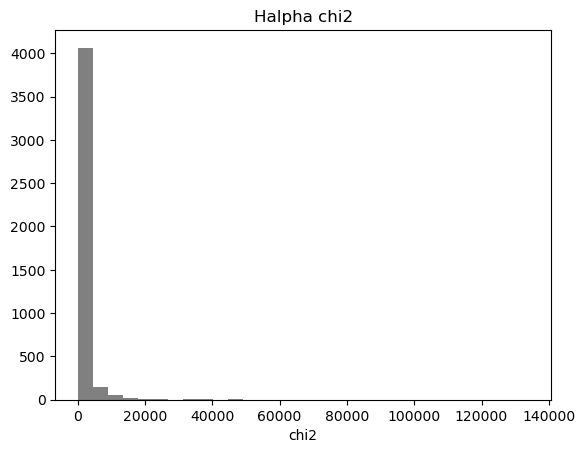

In [24]:
plt.hist(chi2_h_list, bins = 30, color = 'grey');
plt.title('Halpha chi2')
plt.xlabel('chi2')
